# Heart Disease Prediction - Logistic Regression

__Metadata__

1. col1: age
2. col2: sex
3. col3: chest pain type (4 values)
4. col4: resting blood pressure
5. col5: serum cholestoral in mg/dl
6. col6: fasting blood sugar > 120 mg/dl
7. col7: resting electrocardiographic results (values 0,1,2)
8. col8: maximum heart rate achieved
9. col9: exercise induced angina
10. col10 & col11: oldpeak = ST depression induced by exercise relative to rest the slope of the peak exercise ST segment
11. col12: number of major vessels (0-3) colored by flourosopy
12. col13: thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
13. col14: Target column

__Importing Required Libraries__

In [143]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
import ast

## Step-1: Data Understanding and Routine check

In [144]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [145]:
data.shape

(1025, 14)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


__Checking Missing values if any__

In [147]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Missing values

__Statistical Summary__

In [148]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


__Distribution of Target Feature__

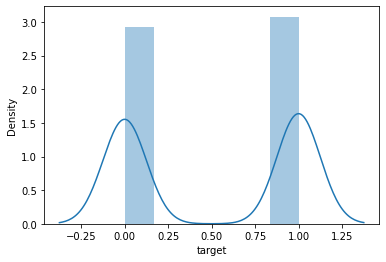

In [149]:
sns.distplot(data['target'])
plt.show()

## Step-2: Train-Test Split

In [150]:
y=data.pop('target')
X=data

In [151]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [152]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(717, 13) (308, 13) (717,) (308,)


## Step-3: Feature Scaling

In [153]:
scaler = StandardScaler()
scaling_cols = ['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']
X_train[scaling_cols] = scaler.fit_transform(X_train[scaling_cols])
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
542,0.814654,0,-0.902951,0.459385,2.877105,0,-1.017245,0.366547,0,0.078282,-0.590322,-0.740953,-0.534060
278,0.034358,1,-0.902951,1.607246,0.849482,0,-1.017245,-0.151143,1,-0.257313,-0.590322,0.189455,1.081641
218,-0.968878,1,-0.902951,0.459385,1.274317,0,0.857728,-1.229665,1,0.581675,-0.590322,1.119864,1.081641
374,-0.968878,0,1.050038,0.574171,-1.313316,0,-1.017245,0.495969,1,0.246080,-2.187533,-0.740953,-0.534060
759,0.703183,0,-0.902951,-0.114546,1.641220,0,-1.017245,0.884237,0,-0.928504,1.006889,-0.740953,-0.534060


__Checking Correlations__

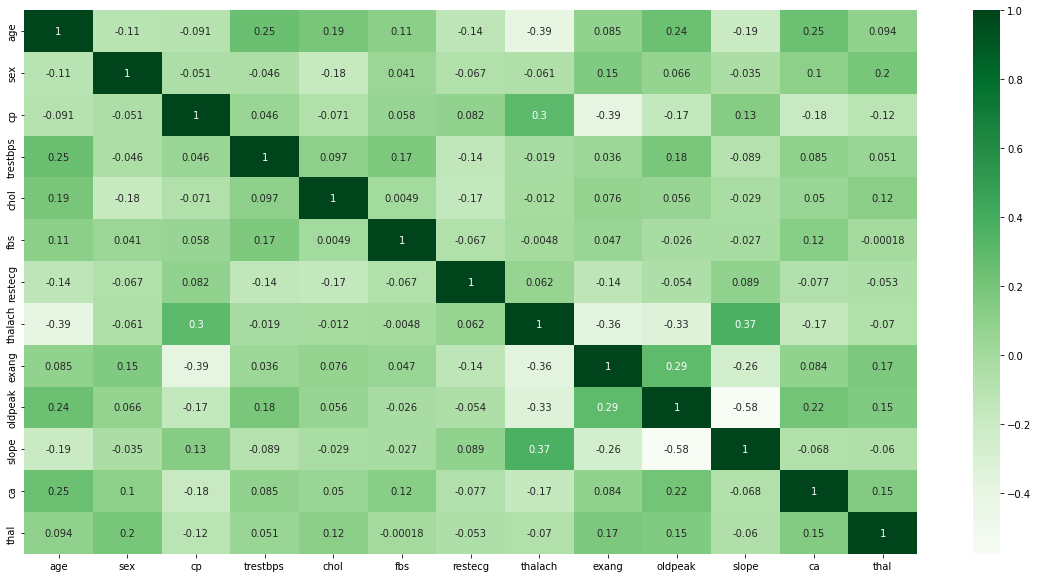

In [154]:
plt.figure(figsize=[20,10])
sns.heatmap(X_train.corr(),cmap='Greens', annot=True)
plt.show()

No Major Highly Correlated variables

## Step-4: Model Building

In [155]:
X_train_sm = sm.add_constant(X_train)
log1 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
model = log1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  717
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -259.38
Date:                Fri, 11 Mar 2022   Deviance:                       518.77
Time:                        12:51:43   Pearson chi2:                     657.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4846
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2753      0.261      4.877      0.000       0.763       1.788
age           -0.1045      0.133     -0.788      0.431      -0.364       0.155
sex           -1.7285      0.292     -5.910      0.000      -2.302      -1.155
cp             0.7667      0.116      6.597      0.000       0.539       0.995
trestbps      -0.2461      0.113     -2.172      0.030      -0.468      -0.024
chol          -0.2333      0.121     -1.931      0.053      -0.470       0.004
fbs            0.3205      0.335      0.957      0.338      -0.336       0.976
restecg        0.2555      0.118      2.165      0.030       0.024       0.487
thalach        0.4762      0.145      3.278      0.001       0.191       0.761
exang         -0.9617      0.264     -3.645      0.000      -1.479      -0.445
oldpeak       -0.7082      0.162     -4.382      0.000      -1.025      -0.391
slope          0.3769      0.137      2.752      0.006       0.109       0.645
ca            -0.6866      0.122     -5.637      0.000      -0.925      -0.448
thal          -0.6058      0.115     -5.274      0.000      -0.831      -0.381
==============================================================================
"""

In [156]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
8,exang,1.90
9,oldpeak,1.71
1,sex,1.68
10,slope,1.62
7,thalach,1.53
0,age,1.40
2,cp,1.26
5,fbs,1.24
11,ca,1.17
3,trestbps,1.15


VIF Scores looks good, there is no Multi-Collinearity

In [157]:
y_train_pred = model.predict(X_train_sm)
y_train_pred

542    0.545553
278    0.020593
218    0.007835
374    0.767580
759    0.898929
         ...   
79     0.725894
855    0.874628
871    0.915043
835    0.451057
792    0.020643
Length: 717, dtype: float64

In [158]:
Result_DataFrame = pd.DataFrame({'Target_Actual':y_train.values,'Target_Probability': y_train_pred})
Result_DataFrame['PatientID'] = y_train.index
Result_DataFrame.head()

,Target_Actual,Target_Probability,PatientID
542,1,0.545553,542
278,0,0.020593,278
218,0,0.007835,218
374,1,0.767580,374
759,0,0.898929,759


In [159]:
Result_DataFrame.isnull().values.any()

False

## Step-5: Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [160]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

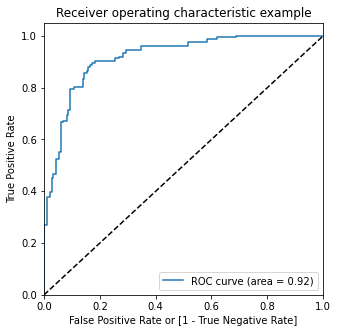

In [161]:
draw_roc(Result_DataFrame.Target_Actual, Result_DataFrame.Target_Probability)

__The ROC curve looks pretty strong with 92% Area Under Curve__

## Step-6: Finding Optimal Cutoff & Metrics Evaluation

In [162]:
cutoffs = [float(i/10) for i in range(0,11)]
cutoffs

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [163]:
for i in cutoffs:
    Result_DataFrame[i] = Result_DataFrame.Target_Probability.map(lambda x: 1 if x>i else 0)

Result_DataFrame.head()    

,Target_Actual,Target_Probability,PatientID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
542,1,0.545553,542,1,1,1,1,1,1,0,0,0,0,0
278,0,0.020593,278,1,0,0,0,0,0,0,0,0,0,0
218,0,0.007835,218,1,0,0,0,0,0,0,0,0,0,0
374,1,0.767580,374,1,1,1,1,1,1,1,1,0,0,0
759,0,0.898929,759,1,1,1,1,1,1,1,1,1,0,0


In [164]:
cutoff_df = pd.DataFrame(columns = ['cutoff','accuracy','sensitivity','specificity'])

num = cutoffs[0:-1]
for i in num:
    cm = metrics.confusion_matrix(Result_DataFrame.Target_Actual,Result_DataFrame[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensi = cm[1,1]/(cm[1,1]+cm[1,0])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

In [165]:
cutoff_df

,cutoff,accuracy,sensitivity,specificity
0.0,0.0,0.499303,1.000000,0.000000
0.1,0.1,0.725244,0.966480,0.484680
0.2,0.2,0.793584,0.960894,0.626741
0.3,0.3,0.821478,0.944134,0.699164
0.4,0.4,0.828452,0.902235,0.754875
0.5,0.5,0.857741,0.888268,0.827298
0.6,0.6,0.838215,0.804469,0.871866
0.7,0.7,0.813110,0.720670,0.905292
0.8,0.8,0.760112,0.581006,0.938719
0.9,0.9,0.688982,0.396648,0.980501


__Plotting Evaluation Scores to Find Trade-off__

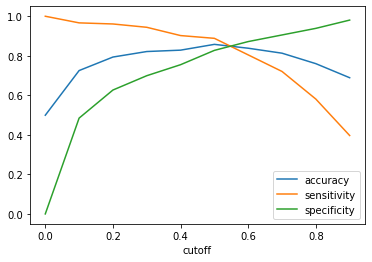

In [166]:
cutoff_df.plot.line(x='cutoff',y=['accuracy','sensitivity','specificity'])
plt.show()

__As we can see from above, all the evaluation metrics are intersecting at point 0.57, Thus we can take 0.57 as our optimal cutoff__

In [167]:
Result_DataFrame['Target_Predicted'] = Result_DataFrame.Target_Probability.map(lambda x: 1 if x > 0.57 else 0)
Result_DataFrame.head()

,Target_Actual,Target_Probability,PatientID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,Target_Predicted
542,1,0.545553,542,1,1,1,1,1,1,0,0,0,0,0,0
278,0,0.020593,278,1,0,0,0,0,0,0,0,0,0,0,0
218,0,0.007835,218,1,0,0,0,0,0,0,0,0,0,0,0
374,1,0.767580,374,1,1,1,1,1,1,1,1,0,0,0,1
759,0,0.898929,759,1,1,1,1,1,1,1,1,1,0,0,1


__Metrics Evaluation for Final Predicted__

In [168]:
confusion = metrics.confusion_matrix(Result_DataFrame.Target_Actual,Result_DataFrame.Target_Predicted)
confusion

array([[308,  51],
       [ 59, 299]], dtype=int64)

In [169]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

In [170]:
#Sensitivity score
TP/TP+FN

60.0

In [171]:
#Specificity Score
TN/TN+FP

52.0

In [172]:
#Precision
TP/TP+FP

52.0

In [173]:
#Accuracy
metrics.accuracy_score(Result_DataFrame.Target_Actual,Result_DataFrame.Target_Predicted)

0.8465829846582985

## Step-7: Prediction on Test-Set

In [174]:
#Scaling

X_test[scaling_cols] = scaler.transform(X_test[scaling_cols])
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
960,-0.300054,0,1.050038,0.229812,-0.946412,0,-1.017245,0.884237,0,-0.844605,-0.590322,-0.740953,-0.534060
48,1.260536,0,1.050038,0.803743,0.637064,0,-1.017245,0.150843,0,-0.928504,-0.590322,0.189455,-0.534060
886,0.703183,1,-0.902951,-0.688476,0.289472,0,0.857728,-0.366848,1,2.091855,-0.590322,0.189455,1.081641
981,-1.749173,1,-0.902951,-0.803263,-0.502267,0,0.857728,-0.366848,0,0.078282,-0.590322,-0.740953,1.081641
973,-0.411524,1,1.050038,-0.401511,-0.000189,1,-1.017245,0.754814,0,1.085069,-0.590322,-0.740953,-0.534060


In [175]:
X_test_sm = sm.add_constant(X_test)

In [176]:
y_test_pred = model.predict(X_test_sm)
y_test_pred

960    0.974543
48     0.885212
886    0.010734
981    0.263474
973    0.680279
         ...   
904    0.854853
946    0.969017
203    0.584724
868    0.747506
433    0.539758
Length: 308, dtype: float64

__Finding Optimal Cutoff : Sensitivity-Specificity Trade-off__

In [177]:
Result_DataFrame_test = pd.DataFrame({'Target_Actual':y_test.values,'Target_Probability': y_test_pred})
Result_DataFrame_test['PatientID'] = y_test.index
Result_DataFrame_test.head()

,Target_Actual,Target_Probability,PatientID
960,1,0.974543,960
48,1,0.885212,48
886,0,0.010734,886
981,0,0.263474,981
973,1,0.680279,973


In [178]:
for i in cutoffs:
    Result_DataFrame_test[i] = Result_DataFrame_test.Target_Probability.map(lambda x: 1 if x>i else 0)

Result_DataFrame_test.head()  

,Target_Actual,Target_Probability,PatientID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
960,1,0.974543,960,1,1,1,1,1,1,1,1,1,1,0
48,1,0.885212,48,1,1,1,1,1,1,1,1,1,0,0
886,0,0.010734,886,1,0,0,0,0,0,0,0,0,0,0
981,0,0.263474,981,1,1,1,0,0,0,0,0,0,0,0
973,1,0.680279,973,1,1,1,1,1,1,1,0,0,0,0


In [179]:
cutoff_df_test = pd.DataFrame(columns = ['cutoff','accuracy','sensitivity','specificity'])

num = cutoffs[0:-1]
for i in num:
    cm = metrics.confusion_matrix(Result_DataFrame_test.Target_Actual,Result_DataFrame_test[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensi = cm[1,1]/(cm[1,1]+cm[1,0])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    
    cutoff_df_test.loc[i] = [i, accuracy, sensi, speci]

In [180]:
cutoff_df_test

,cutoff,accuracy,sensitivity,specificity
0.0,0.0,0.545455,1.000000,0.000000
0.1,0.1,0.750000,0.976190,0.478571
0.2,0.2,0.808442,0.970238,0.614286
0.3,0.3,0.850649,0.970238,0.707143
0.4,0.4,0.853896,0.946429,0.742857
0.5,0.5,0.866883,0.940476,0.778571
0.6,0.6,0.844156,0.857143,0.828571
0.7,0.7,0.792208,0.720238,0.878571
0.8,0.8,0.740260,0.571429,0.942857
0.9,0.9,0.678571,0.410714,1.000000


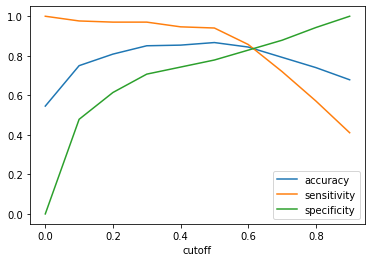

In [181]:
cutoff_df_test.plot.line(x='cutoff',y=['accuracy','sensitivity','specificity'])
plt.show()

__0.62 Looks optimal cutoff__

In [182]:
Result_DataFrame_test['Target_Predicted'] = Result_DataFrame_test.Target_Probability.map(lambda x: 1 if x > 0.62 else 0)
Result_DataFrame_test.head()

,Target_Actual,Target_Probability,PatientID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,Target_Predicted
960,1,0.974543,960,1,1,1,1,1,1,1,1,1,1,0,1
48,1,0.885212,48,1,1,1,1,1,1,1,1,1,0,0,1
886,0,0.010734,886,1,0,0,0,0,0,0,0,0,0,0,0
981,0,0.263474,981,1,1,1,0,0,0,0,0,0,0,0,0
973,1,0.680279,973,1,1,1,1,1,1,1,0,0,0,0,1


In [183]:
confusion_test = metrics.confusion_matrix(Result_DataFrame_test.Target_Actual,Result_DataFrame_test.Target_Predicted)
confusion_test

array([[116,  24],
       [ 26, 142]], dtype=int64)

In [184]:
TP = confusion_test[1,1] #true positive
TN = confusion_test[0,0] #true negative
FP = confusion_test[0,1] #false positive
FN = confusion_test[1,0] #false negative

In [185]:
#Sensitivity score
TP/TP+FN

27.0

In [186]:
#Specificity Score
TN/TN+FP

25.0

In [187]:
#Precision
TP/TP+FP

25.0

In [188]:
#Accuracy
metrics.accuracy_score(Result_DataFrame_test.Target_Actual,Result_DataFrame_test.Target_Predicted)

0.8376623376623377

In [189]:
X_test_sm.columns

Index(['const', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

__So our Model can accurately predict if the patient has Heart Disease or not with approx 84% accuracy__

# Building a Responsive system for End-User

In [190]:
print('Please enter the parameteric details in the given order:\n'
                      '1,','age','sex(1 or 0, 1 being male),','chest_pain(1to4),','blood_pressure,','cholestrol in mg/dl,','sugar_level,'
                      'ecgresults(0,1,2),','max_heart_rate,','exercise induced angina,','oldpeak','slope,','no of vessels,','thal(0,1,2),')
print('Sample: (1,41,0,1,130,204,0,0,172,0,1.4,2,0,2)')

Please enter the parameteric details in the given order:
1, age sex(1 or 0, 1 being male), chest_pain(1to4), blood_pressure, cholestrol in mg/dl, sugar_level,ecgresults(0,1,2), max_heart_rate, exercise induced angina, oldpeak slope, no of vessels, thal(0,1,2),
Sample: (1,41,0,1,130,204,0,0,172,0,1.4,2,0,2)


In [191]:
def predict_disease(user_input=((1,41,0,1,130,204,0,0,172,0,1.4,2,0,2))):
    try:  
        user_input = ast.literal_eval(input())
     
    except:
        user_input = (1,41,0,1,130,204,0,0,172,0,1.4,2,0,2)
    
    userdata=user_input
    prediction = model.predict(userdata)
    
    if prediction > 0.62:

        return print('1 : You are suffering from a Heart Disease')
    else:
        return print('0 : You are NOT suffering from a Heart Disease')

In [192]:
predict_disease()

(1,41,0,1,130,204,0,0,172,0,1.4,2,0,2)
0 : You are NOT suffering from a Heart Disease
